In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [199]:
data=pd.read_csv("C://Users//ridhi//Downloads//final_depression_dataset_1.csv")

In [200]:
data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [201]:
data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [202]:
data.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [204]:
cols=["Have you ever had suicidal thoughts ?","Depression","Family History of Mental Illness"]
for col in cols:
    data[col]=data[col].map({'Yes': 1, 'No': 0})

In [205]:
data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,0,6,2,0,0
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,1,0,4,1,0
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,0,0,2,0,0
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,1,1,2,1,0
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,1,12,3,1,0
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,1,8,3,0,1
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,1,4,4,0,0
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,0,4,5,1,0


In [206]:
#handling null values
data.isnull().sum()


Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [207]:
null_col=["Profession","Academic Pressure","Work Pressure","CGPA","Study Satisfaction","Job Satisfaction"]
for col in null_col:
    print(type(data[col].dtype))

<class 'numpy.dtype[object_]'>
<class 'numpy.dtype[float64]'>
<class 'numpy.dtype[float64]'>
<class 'numpy.dtype[float64]'>
<class 'numpy.dtype[float64]'>
<class 'numpy.dtype[float64]'>


In [208]:
# all the columns like "Academic Pressure","Work Pressure","CGPA","Study Satisfaction","Job Satisfaction" have null values and each of them has float as datatype so replacing each column's null value by it's mean
data["Academic Pressure"].fillna(int(data["Academic Pressure"].mean()), inplace=True)
data["Work Pressure"].fillna(int(data["Work Pressure"].mean()), inplace=True)
data["Study Satisfaction"].fillna(int(data["Study Satisfaction"].mean()), inplace=True)
data["CGPA"].fillna(int(data["CGPA"].mean()), inplace=True)
data["Job Satisfaction"].fillna(int(data["Job Satisfaction"].mean()), inplace=True)

In [209]:
data["Profession"] = data["Profession"].fillna("Unknown")

In [210]:
data.isnull().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [211]:
#visualizing the dataset
#visualizing how many males and females are present in our dataset

import matplotlib.pyplot as plt
import seaborn as sns


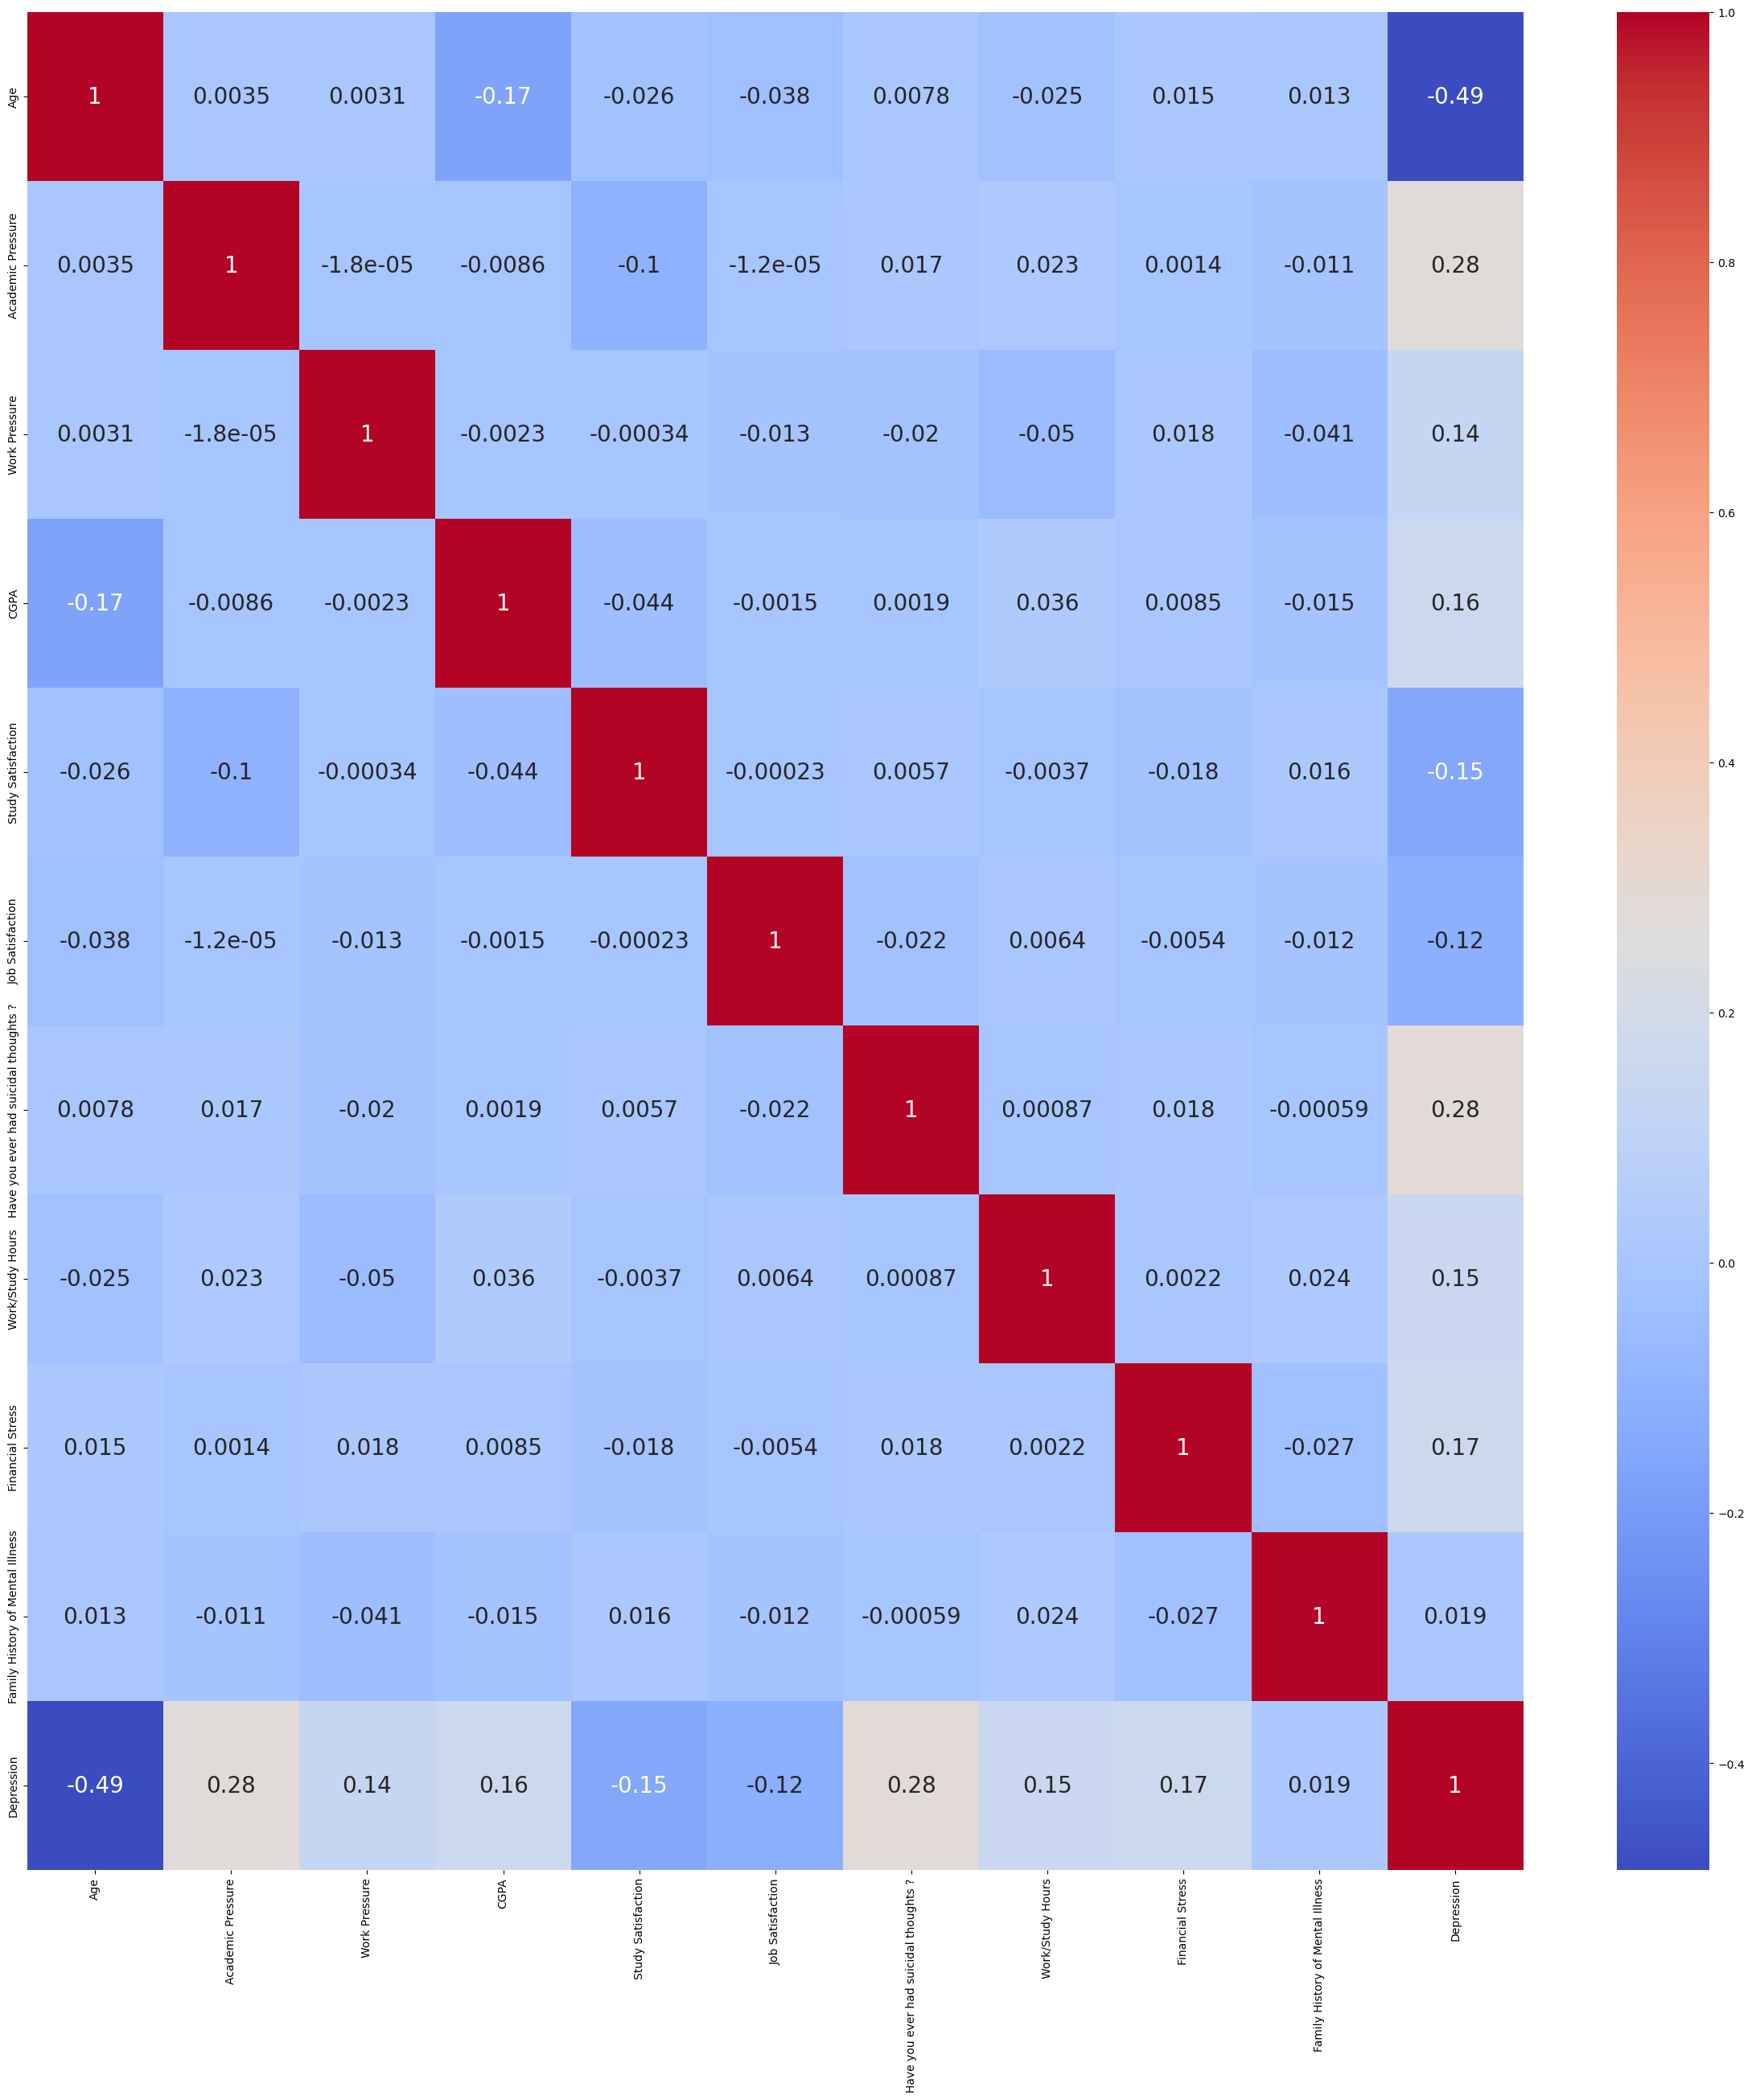

In [212]:
fig=plt.figure(figsize=(30,30))
correlation_matrix=data.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', annot_kws={"size": 20})
plt.show()

In [213]:
data["Age_Group"] = pd.cut(data["Age"], bins=[0, 18, 30, 45, 60, 100], labels=["Teen", "Young Adult", "Adult", "Middle Age", "Senior"])

In [214]:
data = data.drop(columns=["Age"])

In [215]:
data

,Name,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_Group
0,Pooja,Female,Ghaziabad,Working Professional,Teacher,3.0,2.0,7.0,3.0,4.0,7-8 hours,Moderate,MA,0,6,2,0,0,Adult
1,Reyansh,Male,Kalyan,Working Professional,Financial Analyst,3.0,4.0,7.0,3.0,3.0,5-6 hours,Unhealthy,B.Com,1,0,4,1,0,Middle Age
2,Manvi,Female,Bhopal,Working Professional,Teacher,3.0,2.0,7.0,3.0,3.0,5-6 hours,Moderate,M.Com,0,0,2,0,0,Adult
3,Isha,Female,Thane,Working Professional,Teacher,3.0,3.0,7.0,3.0,5.0,7-8 hours,Healthy,MD,1,1,2,1,0,Adult
4,Aarav,Male,Indore,Working Professional,UX/UI Designer,3.0,4.0,7.0,3.0,3.0,7-8 hours,Moderate,BE,1,6,5,1,0,Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,Bangalore,Working Professional,Consultant,3.0,1.0,7.0,3.0,5.0,5-6 hours,Healthy,BBA,1,12,3,1,0,Young Adult
2552,Pihu,Female,Pune,Working Professional,Teacher,3.0,3.0,7.0,3.0,1.0,Less than 5 hours,Moderate,MA,1,8,3,0,1,Young Adult
2553,Sara,Female,Srinagar,Working Professional,HR Manager,3.0,1.0,7.0,3.0,4.0,Less than 5 hours,Moderate,BA,1,4,4,0,0,Young Adult
2554,Eshita,Female,Bangalore,Working Professional,Business Analyst,3.0,2.0,7.0,3.0,3.0,7-8 hours,Healthy,BBA,0,4,5,1,0,Middle Age


In [216]:
depression_column = data.pop("Depression") 
data["Depression"] = depression_column  

In [217]:
data

,Name,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age_Group,Depression
0,Pooja,Female,Ghaziabad,Working Professional,Teacher,3.0,2.0,7.0,3.0,4.0,7-8 hours,Moderate,MA,0,6,2,0,Adult,0
1,Reyansh,Male,Kalyan,Working Professional,Financial Analyst,3.0,4.0,7.0,3.0,3.0,5-6 hours,Unhealthy,B.Com,1,0,4,1,Middle Age,0
2,Manvi,Female,Bhopal,Working Professional,Teacher,3.0,2.0,7.0,3.0,3.0,5-6 hours,Moderate,M.Com,0,0,2,0,Adult,0
3,Isha,Female,Thane,Working Professional,Teacher,3.0,3.0,7.0,3.0,5.0,7-8 hours,Healthy,MD,1,1,2,1,Adult,0
4,Aarav,Male,Indore,Working Professional,UX/UI Designer,3.0,4.0,7.0,3.0,3.0,7-8 hours,Moderate,BE,1,6,5,1,Middle Age,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,Bangalore,Working Professional,Consultant,3.0,1.0,7.0,3.0,5.0,5-6 hours,Healthy,BBA,1,12,3,1,Young Adult,0
2552,Pihu,Female,Pune,Working Professional,Teacher,3.0,3.0,7.0,3.0,1.0,Less than 5 hours,Moderate,MA,1,8,3,0,Young Adult,1
2553,Sara,Female,Srinagar,Working Professional,HR Manager,3.0,1.0,7.0,3.0,4.0,Less than 5 hours,Moderate,BA,1,4,4,0,Young Adult,0
2554,Eshita,Female,Bangalore,Working Professional,Business Analyst,3.0,2.0,7.0,3.0,3.0,7-8 hours,Healthy,BBA,0,4,5,1,Middle Age,0


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Name                                   2556 non-null   object  
 1   Gender                                 2556 non-null   object  
 2   City                                   2556 non-null   object  
 3   Working Professional or Student        2556 non-null   object  
 4   Profession                             2556 non-null   object  
 5   Academic Pressure                      2556 non-null   float64 
 6   Work Pressure                          2556 non-null   float64 
 7   CGPA                                   2556 non-null   float64 
 8   Study Satisfaction                     2556 non-null   float64 
 9   Job Satisfaction                       2556 non-null   float64 
 10  Sleep Duration                         2556 non-null   objec

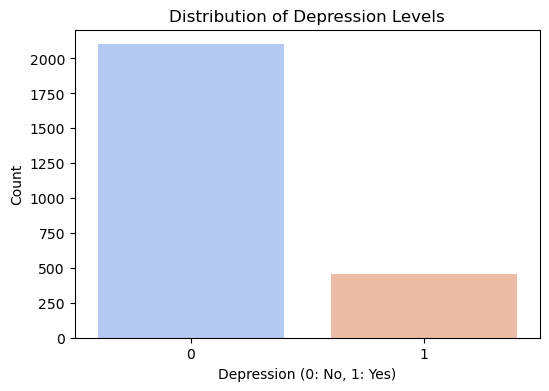

In [219]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=data, palette='coolwarm')
plt.title('Distribution of Depression Levels')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

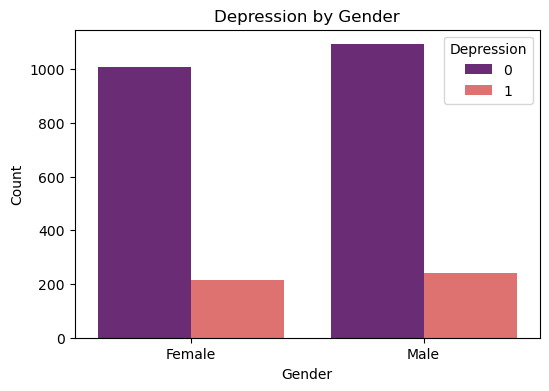

In [220]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Depression', data=data, palette='magma')
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

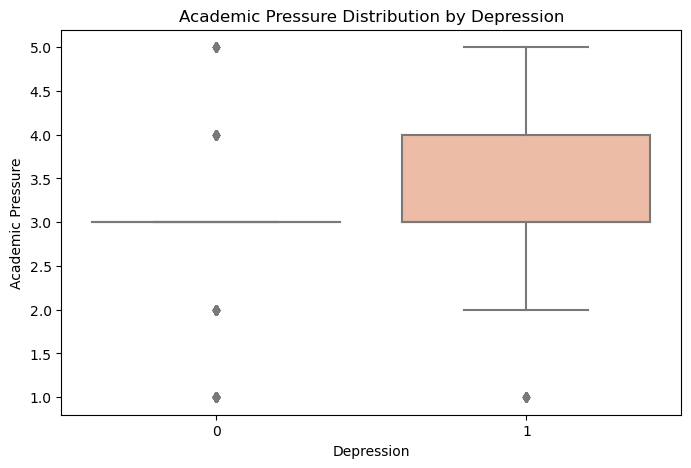

In [221]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Academic Pressure', data=data, palette='coolwarm')
plt.title('Academic Pressure Distribution by Depression')
plt.show()

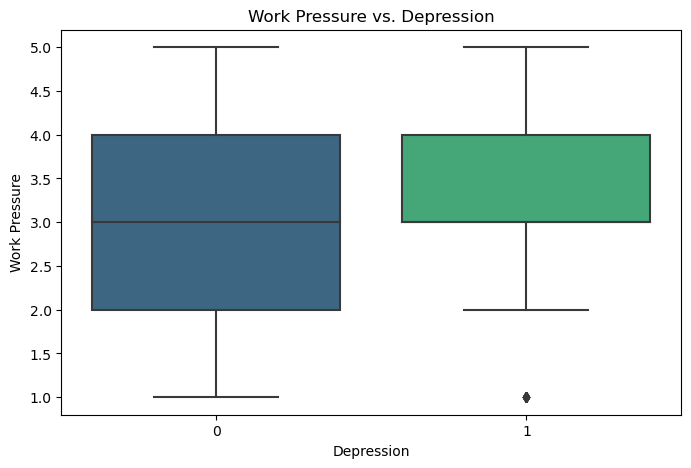

In [222]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Work Pressure', data=data, palette='viridis')
plt.title('Work Pressure vs. Depression')
plt.show()

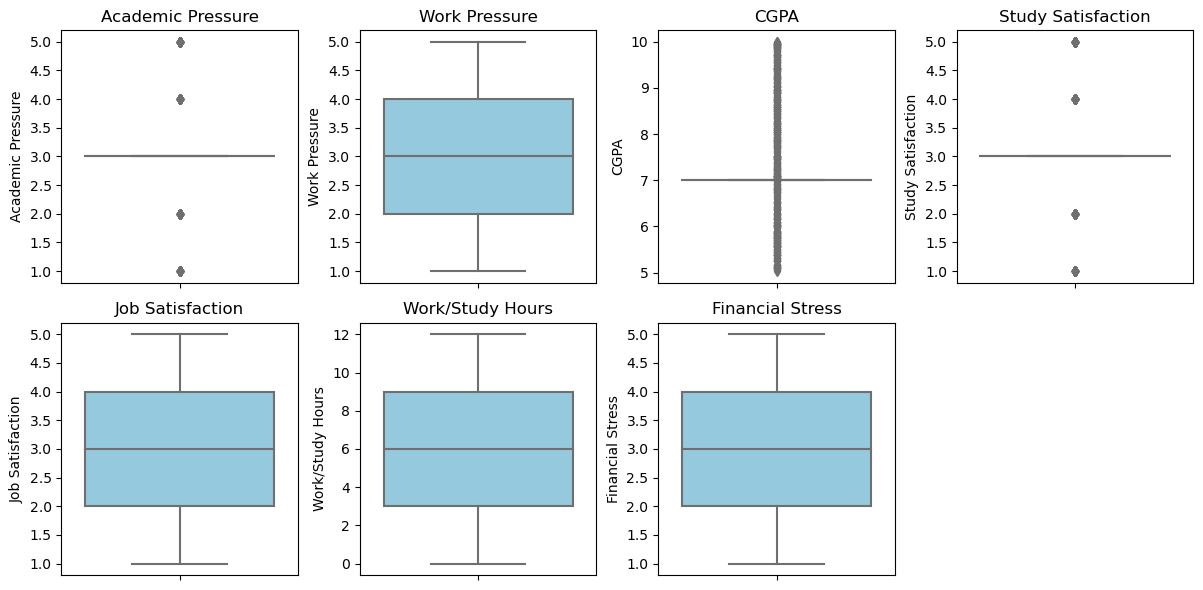

In [223]:

numerical_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction','Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplots for each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # Create a grid of subplots (2 rows, 4 columns)
    sns.boxplot(y=data[col], color='skyblue')  # Boxplot with color
    plt.title(col)  # Add title

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [224]:
import numpy as np
# Apply Winsorization (Capping) for specific columns
columns_to_cap = ["Academic Pressure", "Study Satisfaction"]
for col in columns_to_cap:
    data = cap_outliers(data, col)

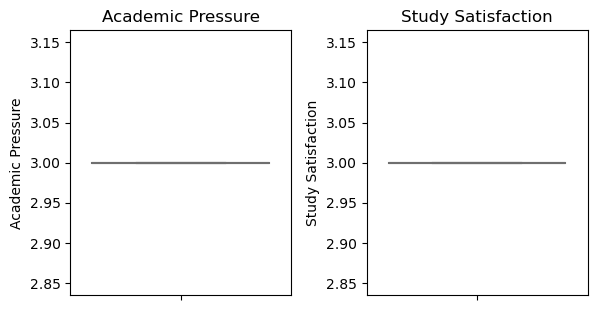

In [225]:
numerical_cols = ['Academic Pressure', 'Study Satisfaction']

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplots for each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # Create a grid of subplots (2 rows, 4 columns)
    sns.boxplot(y=data[col], color='skyblue')  # Boxplot with color
    plt.title(col)  # Add title

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [226]:
data

,Name,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age_Group,Depression
0,Pooja,Female,Ghaziabad,Working Professional,Teacher,3.0,2.0,7.0,3.0,4.0,7-8 hours,Moderate,MA,0,6,2,0,Adult,0
1,Reyansh,Male,Kalyan,Working Professional,Financial Analyst,3.0,4.0,7.0,3.0,3.0,5-6 hours,Unhealthy,B.Com,1,0,4,1,Middle Age,0
2,Manvi,Female,Bhopal,Working Professional,Teacher,3.0,2.0,7.0,3.0,3.0,5-6 hours,Moderate,M.Com,0,0,2,0,Adult,0
3,Isha,Female,Thane,Working Professional,Teacher,3.0,3.0,7.0,3.0,5.0,7-8 hours,Healthy,MD,1,1,2,1,Adult,0
4,Aarav,Male,Indore,Working Professional,UX/UI Designer,3.0,4.0,7.0,3.0,3.0,7-8 hours,Moderate,BE,1,6,5,1,Middle Age,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,Bangalore,Working Professional,Consultant,3.0,1.0,7.0,3.0,5.0,5-6 hours,Healthy,BBA,1,12,3,1,Young Adult,0
2552,Pihu,Female,Pune,Working Professional,Teacher,3.0,3.0,7.0,3.0,1.0,Less than 5 hours,Moderate,MA,1,8,3,0,Young Adult,1
2553,Sara,Female,Srinagar,Working Professional,HR Manager,3.0,1.0,7.0,3.0,4.0,Less than 5 hours,Moderate,BA,1,4,4,0,Young Adult,0
2554,Eshita,Female,Bangalore,Working Professional,Business Analyst,3.0,2.0,7.0,3.0,3.0,7-8 hours,Healthy,BBA,0,4,5,1,Middle Age,0


In [230]:
data

,Name,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age_Group,Depression
0,Pooja,Female,Ghaziabad,Working Professional,Teacher,3.0,2.0,7.0,3.0,4.0,7-8 hours,Moderate,MA,0,6,2,0,Adult,0
1,Reyansh,Male,Kalyan,Working Professional,Financial Analyst,3.0,4.0,7.0,3.0,3.0,5-6 hours,Unhealthy,B.Com,1,0,4,1,Middle Age,0
2,Manvi,Female,Bhopal,Working Professional,Teacher,3.0,2.0,7.0,3.0,3.0,5-6 hours,Moderate,M.Com,0,0,2,0,Adult,0
3,Isha,Female,Thane,Working Professional,Teacher,3.0,3.0,7.0,3.0,5.0,7-8 hours,Healthy,MD,1,1,2,1,Adult,0
4,Aarav,Male,Indore,Working Professional,UX/UI Designer,3.0,4.0,7.0,3.0,3.0,7-8 hours,Moderate,BE,1,6,5,1,Middle Age,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,Bangalore,Working Professional,Consultant,3.0,1.0,7.0,3.0,5.0,5-6 hours,Healthy,BBA,1,12,3,1,Young Adult,0
2552,Pihu,Female,Pune,Working Professional,Teacher,3.0,3.0,7.0,3.0,1.0,Less than 5 hours,Moderate,MA,1,8,3,0,Young Adult,1
2553,Sara,Female,Srinagar,Working Professional,HR Manager,3.0,1.0,7.0,3.0,4.0,Less than 5 hours,Moderate,BA,1,4,4,0,Young Adult,0
2554,Eshita,Female,Bangalore,Working Professional,Business Analyst,3.0,2.0,7.0,3.0,3.0,7-8 hours,Healthy,BBA,0,4,5,1,Middle Age,0


In [231]:
data.columns

Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Age_Group', 'Depression'],
      dtype='object')

In [232]:
import pandas as pd

# Mapping for Gender (Binary Encoding)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Mapping for Sleep Duration (Ordinal Encoding)
sleep_map = {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4}
data['Sleep Duration'] = data['Sleep Duration'].map(sleep_map)

# Mapping for Dietary Habits (Ordinal Encoding)
diet_map = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
data['Dietary Habits'] = data['Dietary Habits'].map(diet_map)

# Label Encoding for Ordinal Columns
ordinal_cols = ['Working Professional or Student', 'Degree', 'Age_Group']
for col in ordinal_cols:
    data[col] = data[col].astype('category').cat.codes

# One-hot Encoding for Non-Ordinal Columns
data = pd.get_dummies(data, columns=['Name', 'City', 'Profession'], drop_first=True)

# Convert boolean dummies to int (if any)
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

In [236]:
print(data.dtypes)

Gender                               int64
Working Professional or Student       int8
Academic Pressure                  float64
Work Pressure                      float64
CGPA                               float64
                                    ...   
Profession_Software Engineer         int32
Profession_Teacher                   int32
Profession_Travel Consultant         int32
Profession_UX/UI Designer            int32
Profession_Unknown                   int32
Length: 295, dtype: object


In [240]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [241]:
x

array([[1., 1., 3., ..., 1., 0., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       [1., 1., 3., ..., 1., 0., 0.],
       ...,
       [1., 1., 3., ..., 0., 0., 0.],
       [1., 1., 3., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.]])

In [242]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [250]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif, VarianceThreshold

In [251]:

# Assuming x is a NumPy array and y is a NumPy array

# Step 1: Remove constant features
selector = VarianceThreshold(threshold=0)  # Keeps only features with non-zero variance
x = selector.fit_transform(x)

# Step 2: Handle NaN or infinite values
x = np.nan_to_num(x, nan=np.nanmean(x, axis=0))  # Fill NaN values with the mean
x = np.nan_to_num(x, posinf=1e10, neginf=-1e10)  # Replace infinite values

# Step 3: Convert x to a pandas DataFrame (optional, for feature names)
feature_names = [f"feature_{i}" for i in range(x.shape[1])]  # Replace with actual feature names if available
x_df = pd.DataFrame(x, columns=feature_names)

# Step 4: Apply SelectKBest
k = 5  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(x_df, y)

# Step 5: Get selected feature names
selected_features = x_df.columns[selector.get_support()]

print("Selected Features:", selected_features.tolist())


Selected Features: ['feature_1', 'feature_3', 'feature_12', 'feature_13', 'feature_289']


In [253]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X_new)
print(scaled_features)

[[ 0.49436947 -0.16235929 -0.03406844 -0.46536388  2.63398713]
 [ 0.49436947 -0.16235929  1.14267377 -0.46536388 -0.37965258]
 [ 0.49436947 -0.16235929 -0.03406844 -0.46536388  2.63398713]
 ...
 [ 0.49436947 -0.16235929 -1.21081064 -0.46536388 -0.37965258]
 [ 0.49436947 -0.16235929  1.14267377 -0.46536388 -0.37965258]
 [-2.02277865 -0.59912992 -2.38755284  2.14885607 -0.37965258]]


In [254]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.2)

In [255]:
classifiers={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'K Nearest Neighbor':KNeighborsClassifier()
}

In [256]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
results={}
for name,c in classifiers.items():
    c.fit(x_train,y_train)
    y_pred=c.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    print(f"confusion matrix for {name} \n",cm)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy
    print(f"Accuracy {accuracy*100:.2f}%")
    print(classification_report(y_test,y_pred))
    print("  ")

confusion matrix for LogisticRegression 
 [[376   0]
 [ 26 110]]
Accuracy 94.92%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       376
           1       1.00      0.81      0.89       136

    accuracy                           0.95       512
   macro avg       0.97      0.90      0.93       512
weighted avg       0.95      0.95      0.95       512

  
confusion matrix for DecisionTree 
 [[376   0]
 [ 26 110]]
Accuracy 94.92%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       376
           1       1.00      0.81      0.89       136

    accuracy                           0.95       512
   macro avg       0.97      0.90      0.93       512
weighted avg       0.95      0.95      0.95       512

  
confusion matrix for RandomForest 
 [[376   0]
 [ 26 110]]
Accuracy 94.92%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       376
